In [1]:
# imports packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
# funcao para redimensionar a imagem
def rescale_image(image_ri, proportion_ri, interpolation=None):
    #   avalia se o parametro que foi passado para a imagem foi um caminho para o
    #    arquivo ou uma imagem em forma de numpy array
    image_result = np.array([])
    if type(image_result) == str:
        image_result = cv2.imread(image_ri)
    elif type(image_result) == np.ndarray:
        image_result = np.copy(image_ri)
    # Se o parametro de proporção for maior que 1 será feita interpolação dependendo
    # do parametro interpolação
    if proportion_ri >= 1:
        if interpolation == 'vizinho':
            image_result = rescale_image_neighbor(image_result, proportion_ri)
        elif interpolation == 'bilinear':
            image_result = rescale_image_bilinear(image_result, proportion_ri)
    
    # Esse caso se refere à redução das proporções e nesse caso trataremos de
    #  eliminar pixels
    elif proportion_ri > 0:
        proportion_division = 1/proportion_ri
        row, col = image_result.shape
        row_scale = [r for r in range(row) if not (int(r%proportion_division) == 0)]
        col_scale = [c for c in range(col) if not (int(c%proportion_division) == 0)]
        image_result = np.delete(image_result, row_scale, axis=0)
        image_result = np.delete(image_result, col_scale, axis=1)
    print(image_result.shape)
    return image_result

In [3]:
# funcao para aumentar a proporção da imagem utilizando vizinho mais próximo
def rescale_image_neighbor(image, proportion):
    image_rescale = np.copy(image)
    # get the row, column and channel lengths
    row, col = image.shape
    new_row, new_col = [np.floor(entry*proportion) for entry in image_rescale.shape]
    row_index = 1
    resto_sum = 0
    while row_index < new_row:
        qtd_row_insert = proportion - 1
        while qtd_row_insert >= 0:
            if qtd_row_insert >= 1:
                image_rescale = np.insert(image_rescale,
                                            row_index, 
                                            image_rescale[row_index-1,:], 
                                            axis=0)
                row_index += 1
                qtd_row_insert -= 1
            elif qtd_row_insert >= 0:
                resto_sum += qtd_row_insert
                row_index += 1
                qtd_row_insert -= 1
            if resto_sum >= 1:
                image_rescale = np.insert(image_rescale, row_index, 0, axis=0)
                row_index += 1
                resto_sum -= 1
            row, _ = image_rescale.shape

    col_index = 1
    resto_sum = 0
    while col_index < new_col:
        qtd_col_insert = proportion - 1
        while qtd_col_insert >= 0:
            if qtd_col_insert >= 1:
                image_rescale = np.insert(image_rescale,
                                          col_index,
                                          image_rescale[:,col_index-1],
                                          axis=1)
                col_index += 1
                qtd_col_insert -= 1
            elif qtd_col_insert >= 0:
                resto_sum += qtd_col_insert
                col_index += 1
                qtd_col_insert -= 1
            if resto_sum >= 1:
                image_rescale = np.insert(image_rescale,
                                          col_index,
                                          image_rescale[:,col_index-1],
                                          axis=1)
                col_index += 1
                resto_sum -= 1
            _, col = image_rescale.shape
            
    return image_rescale

In [24]:
def processar_bilinear_por_pixel(imArr, posX, posY):
    pixel_resultado = []
 
    #Get integer and fractional parts of numbers
    modXi = int(posX)
    modYi = int(posY)
    modXf = posX - modXi
    modYf = posY - modYi
    modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
    modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
    #Get pixels in four corners
    bl = imArr[modYi, modXi]
    br = imArr[modYi, modXiPlusOneLim]
    tl = imArr[modYiPlusOneLim, modXi]
    tr = imArr[modYiPlusOneLim, modXiPlusOneLim]

    #Calculate interpolation
    b = modXf * br + (1. - modXf) * bl
    t = modXf * tr + (1. - modXf) * tl
    pxf = modYf * t + (1. - modYf) * b
    pixel_resultado.append(int(pxf+0.5))
 
    return pixel_resultado

In [25]:
def rescale_image_bilinear(image_rib, proportion_rib):
    enlargedShape = list(map(int, [image_rib.shape[0]*0.3, image_rib.shape[1]*0.3]))
    enlargedImg = np.empty(enlargedShape, dtype=np.uint8)
    rowScale = float(image_rib.shape[0]) / float(enlargedImg.shape[0])
    colScale = float(image_rib.shape[1]) / float(enlargedImg.shape[1])
 
    for r in range(enlargedImg.shape[0]):
        for c in range(enlargedImg.shape[1]):

            orir = r * rowScale #Find position in original image
            oric = c * colScale
            enlargedImg[r, c] = processar_bilinear_por_pixel(image_rib, oric, orir)

In [26]:
uis = rescale_image_bilinear(imagem_reduce_array[0], 2).astype(np.uint8)
plt.imshow(uis, cmap='gray')

ValueError: setting an array element with a sequence.

In [7]:
# Padding image to run the algorithm
def pad_image(image_pi, type_pad, rgb=False):
    # If image is rgb make a frame of pixel taken from the edge of the image
    # for each color
    if rgb:
        im_padded = [np.pad(original_image[:,:,i], 1, type_pad)
                     for i in range(original_image.shape[-1])]
        im_padded = [np.expand_dims(image_p, axis=2) for image_p in im_padded]
        return np.concatenate(im_padded, axis=2)
    # If image is rgb make a frame of pixel taken from the edge of the image
    else:
        return np.copy(np.pad(image_pi, 1, type_pad))

In [8]:
# Mostrar imagens
def show_subplots_image(image_array, nrow, ncol,fig_size_array, 
                        title_array, cmap=None):
    fig, axes = plt.subplots(nrow, ncol, figsize=fig_size_array)
    for ax, image, title in zip(axes.flatten(), image_array, title_array):
        ax.axis('off')
        ax.set_title(title)
        fig.tight_layout()
        ax.imshow(image, cmap=cmap)

In [9]:
def redifine_image_reduce_to_show_scale(image_rirtds, image_reference):
    image_redefine = np.copy(image_rirtds)
    image_result = list()
    for image_idx, image_resize in enumerate(image_redefine):
        image_ones = np.ones(image_reference.shape)
        for i in range(image_ones.shape[0]):
            for j in range(image_ones.shape[1]):
                if i < image_resize.shape[0] and j < image_resize.shape[1]:
                    image_ones[i,j] = image_resize[i,j]
                else:
                    image_ones[i,j] = image_reference[i,j]
        image_result.append(image_ones)
    return image_result

b) Utilize o sua função do item anterior para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16. Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original. Há diferenças de qualidade entre estas imagens? Comente. (Obs.: Plote os resultados para que possam se visualizados).

In [20]:
# carregar imagem, converter para RGB e normaliza-la
original_image = cv2.imread('../imagens/image.jpg', cv2.IMREAD_GRAYSCALE)
# original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# original_image = \
#     (original_image - np.min(original_image))/ \
#     (np.max(original_image) - np.min(original_image))

In [21]:
proportion_list = [1/2, 1/4, 1/8, 1/16]
title_array = ['1/2 da Imagem', '1/4 da Imagem', '1/8 da Imagem', '1/16 da Imagem']
imagem_reduce_array = [rescale_image(original_image, proportion_ri=proportion)
                       for proportion in proportion_list]

ValueError: too many values to unpack (expected 2)

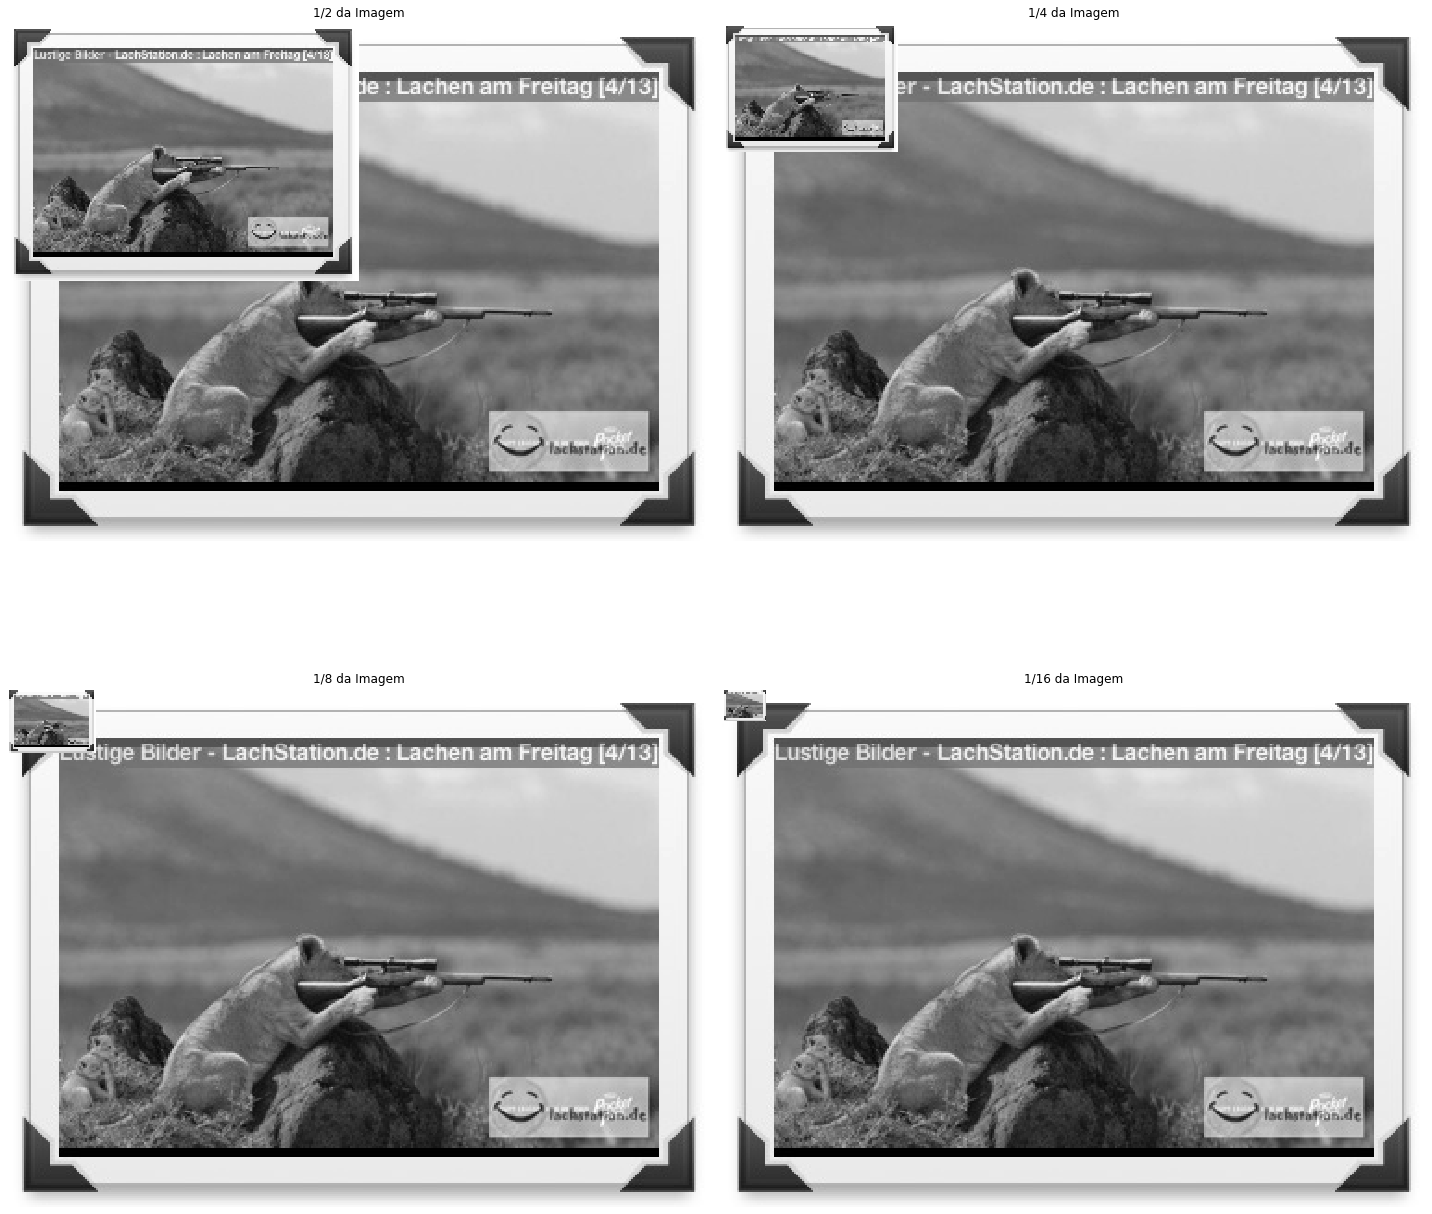

In [18]:
# Show images
image_to_plot_reduce = redifine_image_reduce_to_show_scale(imagem_reduce_array,
                                                           original_image)
IMAGE_SIZE=[20,20]
show_subplots_image(image_to_plot_reduce, 2, 2, IMAGE_SIZE,
                    title_array=title_array, cmap='gray')

In [ ]:
proportion_expand_list = [2, 4, 8, 16]
expand_proportion = zip(imagem_reduce_array, proportion_expand_list)
imagem_vizinho = \
    [rescale_image(im_expand, proportion=proportion, interpolation='vizinho')
     for im_expand, proportion in expand_proportion]

In [ ]:
# Show images
title_expand = ['2x Aumentada', '4x Aumentada', '8x Aumentada', '16x Aumentada']
show_subplots_image(imagem_vizinho, 2, 2, IMAGE_SIZE, title_expand, 'gray')

c) Modifique a função desenvolvida em (a), de forma que seja utilizada a técnica de interpolação bilinear e refaça o que se pede no item (b) novamente. (Obs.: Plote os resultados para que possam se visualizados). 

In [ ]:
expand_proportion_bilinear = zip(imagem_reduce_array, proportion_expand_list)

In [ ]:
imagem_bilinear = \
    [rescale_image(im_expand, proportion=proportion, interpolation='bilinear')
     for im_expand, proportion in expand_proportion_bilinear]

In [ ]:
# Show images
show_subplots_image(imagem_bilinear, 2, 2, IMAGE_SIZE, title_expand, 'gray')